In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SEED = 1234
num_samples = 50

In [3]:
np.random.seed(SEED)

In [4]:
# y = XW + b
# for example, y = 3.5X + random_noise

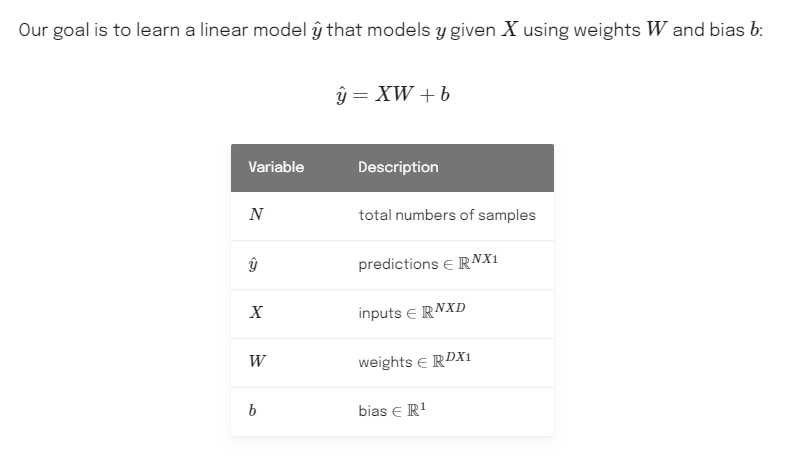

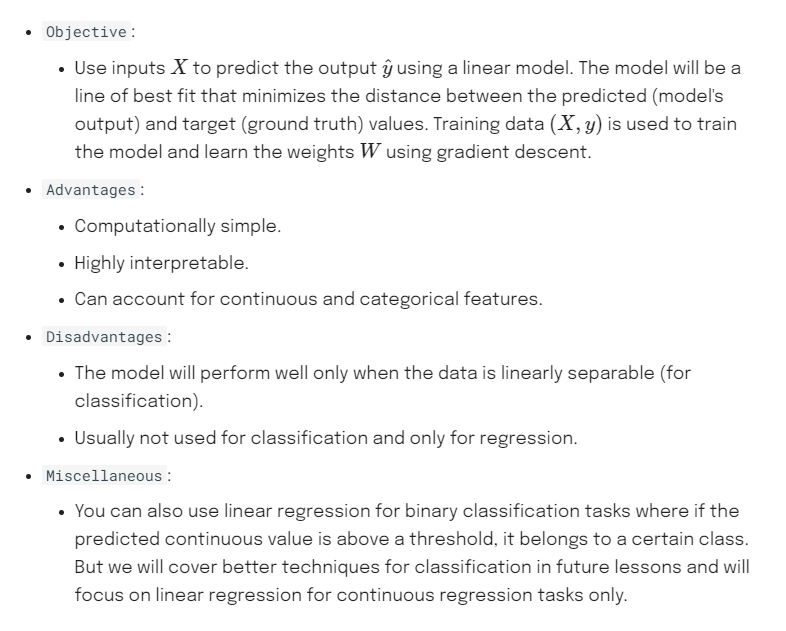

In [5]:
def generate_data(n_sample):
  X = np.array(range(n_sample))
  random_noise = np.random.uniform(-10,20,size=n_sample)
  y = 3.5*X + random_noise
  return X, y

[np.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html)

In [6]:
X, y = generate_data(num_samples)
data = np.vstack([X, y]).T
print(data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.16326313]
 [ 2.         10.13183217]
 [ 3.         24.06075751]
 [ 4.         27.39927424]]


[vstack](https://blog.csdn.net/u012609509/article/details/70319293)

In [9]:
df = pd.DataFrame(data, columns=['X', 'y'])
X = df[['X']].values
y = df[['y']].values
df.head()

,X,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


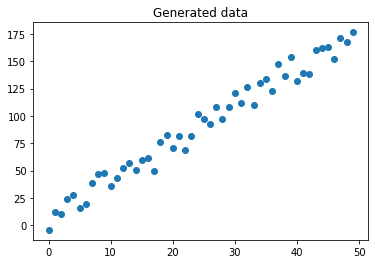

In [10]:
plt.title("Generated data")
plt.scatter(x = df['X'], y = df['y'])
plt.show()

In [26]:
# split data by using numpy
# train: used to train our model.
# val : used to validate our model's performance during training.
# test: used to do an evaluation of our fully trained model.

TRAIN_SIZE = 0.7
TEST_SIZE = 0.15
VAL_SIZE = 0.15

indices = list(range(num_samples))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [27]:
# split the indices
train_start = 0
train_end = int(TRAIN_SIZE*num_samples)
val_start = train_end
val_end = int((TRAIN_SIZE + TEST_SIZE) * num_samples)
test_start = val_end

In [30]:
# split the data
X_train = X[train_start: train_end]
y_train = y[train_start: train_end]
X_val = X[val_start: val_end]
y_val = y[val_start: val_end]
X_test = X[test_start:]
y_test = y[test_start:]

In [31]:
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


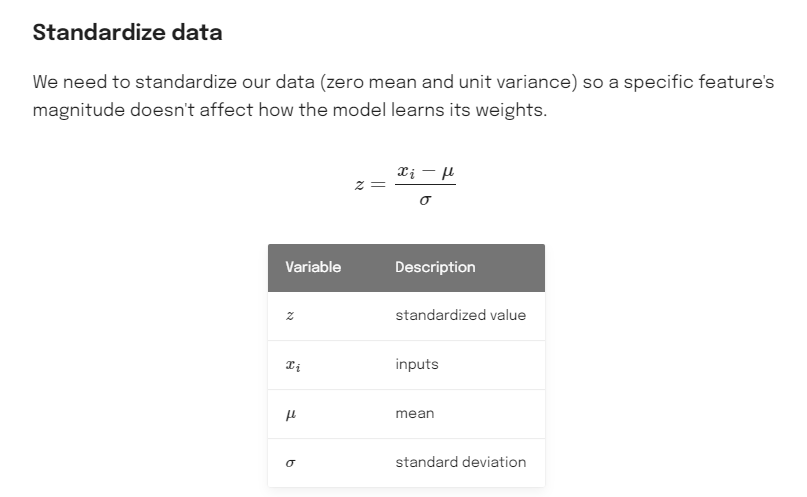

In [32]:
# standardize data
def standardize_data(data, mean, std):
  return (data - mean)/std

In [33]:
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [34]:
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [35]:
# Check (means should be ~0 and std should be ~1)
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.0, std: 1.0
mean: -0.2, std: 0.9


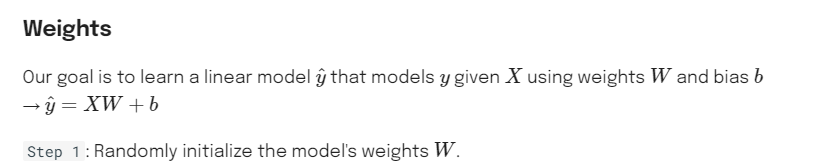

In [36]:
INPUT_DIM = X_train.shape[1] # X is 1-dimensional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional

In [38]:
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,1))
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


[numpy.random.randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)

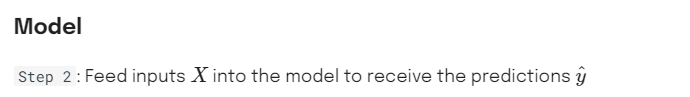

In [39]:
y_pred = np.dot(X_train, W) + b

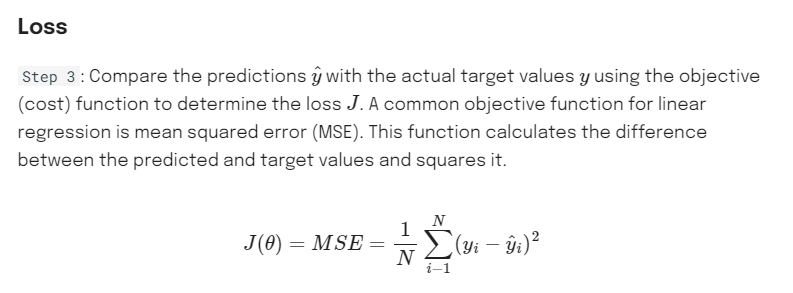

In [41]:
N = len(y_train)
loss = (1/N) * np.sum((y_train - y_pred)**2)

In [42]:
print(f"loss: {loss:.2f}")

loss: 0.96


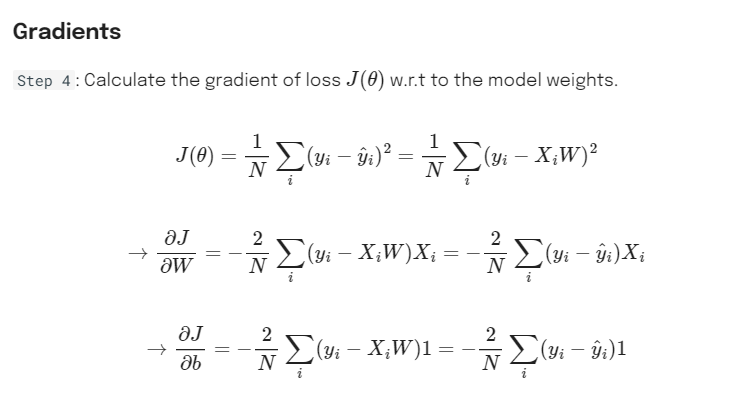

In [46]:
dw = -(2/N) * (np.sum((y_train - y_pred) * X_train))
db = -(2/N) * (np.sum((y_train - y_pred) * 1))

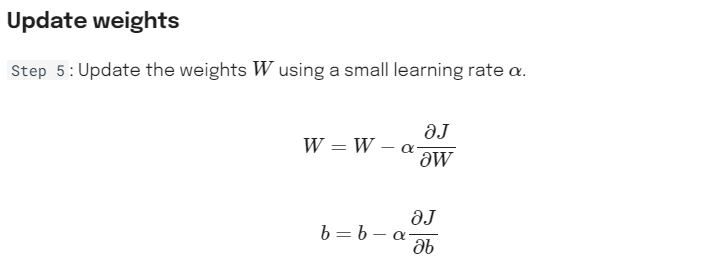

In [47]:
learning_rate = 1e-1
W += -dw*learning_rate
b += -db*learning_rate

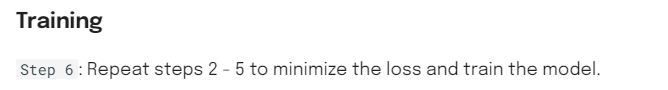

In [48]:
num_epochs = 100

In [50]:
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,))

for epoch_num in range(num_epochs):
  # forward pass
  y_pred = np.dot(X_train, W) + b
  # loss
  loss = (1/len(y_train))* np.sum((y_train-y_pred)**2)
  
  if epoch_num % 10 == 0:
    print (f"Epoch: {epoch_num}, loss: {loss:.3f}")
  #backpropagation
  dw = -(2/N) * (np.sum((y_train - y_pred) * X_train))
  db = -(2/N) * (np.sum((y_train - y_pred) * 1))
  W += -dw*learning_rate
  b += -db*learning_rate

Epoch: 0, loss: 1.013
Epoch: 10, loss: 0.034
Epoch: 20, loss: 0.023
Epoch: 30, loss: 0.023
Epoch: 40, loss: 0.023
Epoch: 50, loss: 0.023
Epoch: 60, loss: 0.023
Epoch: 70, loss: 0.023
Epoch: 80, loss: 0.023
Epoch: 90, loss: 0.023


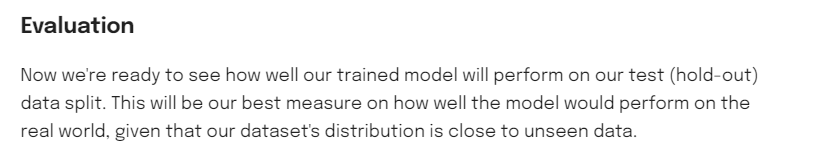

In [51]:
pred_train = W*X_train + b
pred_test = W*X_test + b

In [53]:
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.02, test_MSE: 0.05


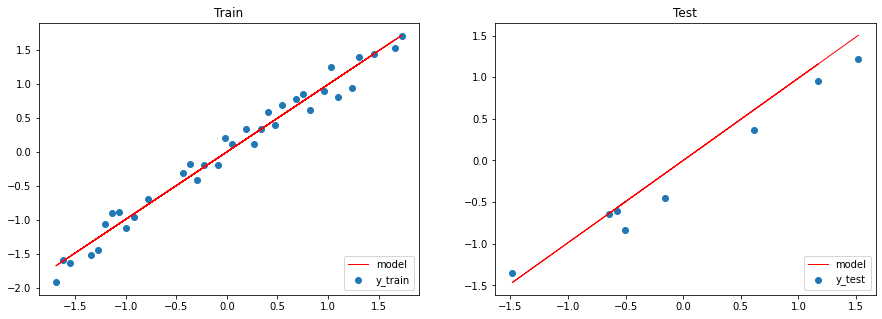

In [54]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label='y_train')
plt.plot(X_train, pred_train, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Show plots
plt.show()


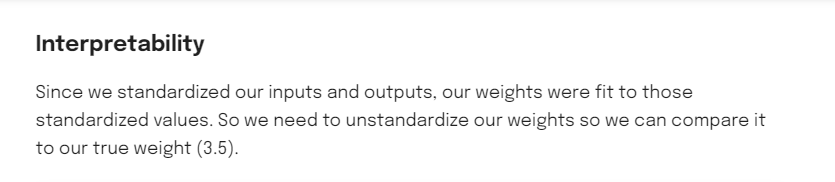

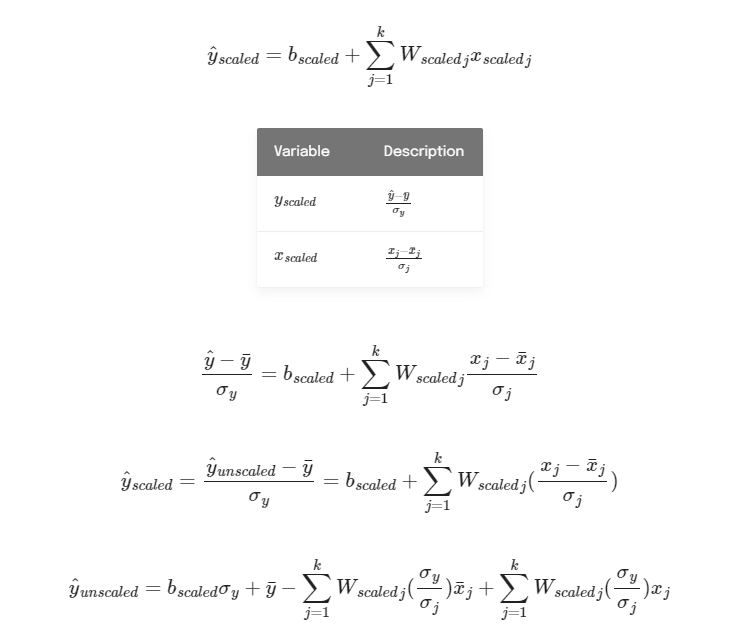

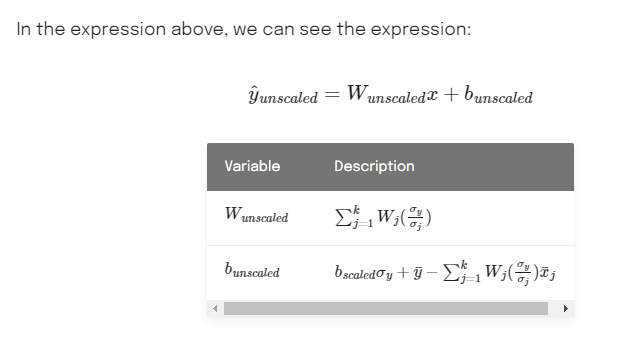

In [56]:
W_unscaled = W * (y_std/ X_std)
b_unscaled = b*y_std + y_mean - np.sum(W_unscaled*X_mean)
print ("[actual] y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.1f}X + {b_unscaled[0]:.1f}")

[actual] y = 3.5X + noise
[model] y_hat = 3.5X + 7.9
